# EXPLORATORY DATA ANALYSIS

In this exploratory analysis, i'm going to answer several question, such as:

1. Which Months generate the highest Order and Revenue?
2. Which Day of a week generate the highest Order and Revenue?
3. Which hour the most Order are made?
4. Which Date contributes the highest revenue?
5. How does each category contributes to the revenue? is there any patterns?
6. How does the user rentention level?
7. Pre and Post Covid (Category)
8. Which location the most Order are made?

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('EVN/clean_df.csv', parse_dates=['trx_date'])

In [3]:
df.head()

,user_id,event_id,trx_date,price,total_ticket_sold,user_type,location,years,month_year,days,hours,date,dayofmonth,total_price,word_event,sub_category,invoice_number
0,d3bf14fe0bffbb499ef0d341f4b7c12aad9fbd3b9e0fd6...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,2019-01-01 02:15:30,75000,3,Registered,Jakarta,2019,2019-01,2,9,2019-01-01,1,225000,Art Exhibition,attractions,1
1,4f3e46a6e94452b566553485b619d2f305bd9d875d4f6d...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,2019-01-01 03:04:32,75000,2,Guest,Jakarta,2019,2019-01,2,10,2019-01-01,1,150000,Art Exhibition,attractions,2
2,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,2019-01-01 03:11:44,100000,1,Registered,Jakarta,2019,2019-01,2,10,2019-01-01,1,100000,Art Exhibition,attractions,3
3,23c44b20dafb34672868945ce6428ead219eb8bb5312c5...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,2019-01-01 03:11:50,100000,1,Registered,Jakarta,2019,2019-01,2,10,2019-01-01,1,100000,Art Exhibition,attractions,4
4,38b796a79de6f453bb1ccc704e8aa86dd21f186398614e...,6629d5a73302852ef915dbda22fa1994213eb36e41c893...,2019-01-01 03:15:19,75000,1,Guest,Jakarta,2019,2019-01,2,10,2019-01-01,1,75000,Art Exhibition,attractions,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69117 entries, 0 to 69116
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            69117 non-null  object        
 1   event_id           69117 non-null  object        
 2   trx_date           69117 non-null  datetime64[ns]
 3   price              69117 non-null  int64         
 4   total_ticket_sold  69117 non-null  int64         
 5   user_type          69117 non-null  object        
 6   location           69117 non-null  object        
 7   years              69117 non-null  int64         
 8   month_year         69117 non-null  object        
 9   days               69117 non-null  int64         
 10  hours              69117 non-null  int64         
 11  date               69117 non-null  object        
 12  dayofmonth         69117 non-null  int64         
 13  total_price        69117 non-null  int64         
 14  word_e

In [5]:
df['invoice_number'] = df['invoice_number'].astype('str')

### 1. Which Months generate the highest Order and Revenue?

In [6]:
print("This dataset contain information from {} to {}".format(df['month_year'].unique()[0], df['month_year'].unique()[-1]))

This dataset contain information from 2019-01 to 2020-06


In [7]:
order = df.groupby('invoice_number')['month_year'].unique().value_counts()
order = order.sort_index()

In [8]:
revenue = df.groupby('month_year')['total_price'].sum()

In [9]:
ord_rev = pd.DataFrame({'Total Order':order, 'Total Revenue':revenue})

(0.0, 3000.0)

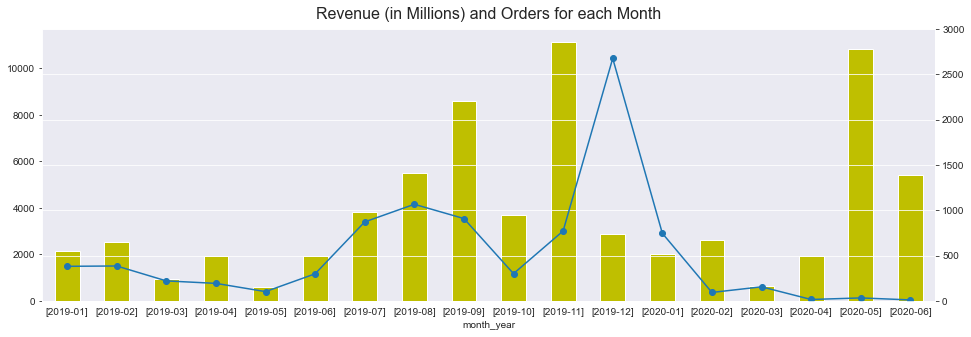

In [10]:
fig, ax1 = plt.subplots(figsize=(16,5))
ax1 = ord_rev['Total Order'].plot(kind='bar', color='y', label='Orders')
ax2 = (ord_rev['Total Revenue']/1000000).plot(kind='line', marker='o', secondary_y=True, label='Revenue')
ax1.set_title('Revenue (in Millions) and Orders for each Month', fontsize=16, pad=10)
ax2.set_ylim(0, 3000)

### REGISTERED

In [11]:
order = df[df['user_type']=='Registered'].groupby('invoice_number')['month_year'].unique().value_counts()
order = order.sort_index()

In [12]:
revenue = df[df['user_type']=='Registered'].groupby('month_year')['total_price'].sum()

In [13]:
ord_rev = pd.DataFrame({'Total Order':order, 'Total Revenue':revenue})

(0.0, 3000.0)

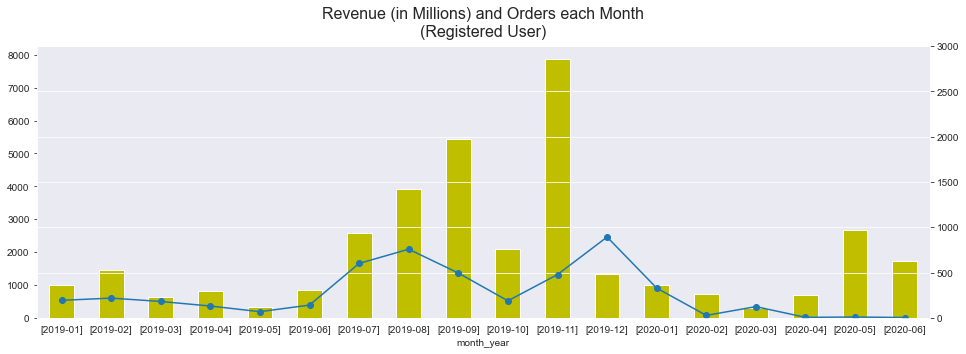

In [14]:
fig, ax1 = plt.subplots(figsize=(16,5))
ax1 = ord_rev['Total Order'].plot(kind='bar', color='y', label='Orders')
ax2 = (ord_rev['Total Revenue']/1000000).plot(kind='line', marker='o', secondary_y=True, label='Revenue')
ax1.set_title('Revenue (in Millions) and Orders each Month\n(Registered User)', fontsize=16, pad=10)
ax2.set_ylim(0, 3000)

### GUEST

In [15]:
order = df[df['user_type']!='Registered'].groupby('invoice_number')['month_year'].unique().value_counts()
order = order.sort_index()

In [16]:
revenue = df[df['user_type']!='Registered'].groupby('month_year')['total_price'].sum()

In [17]:
ord_rev = pd.DataFrame({'Total Order':order, 'Total Revenue':revenue})

(0.0, 3000.0)

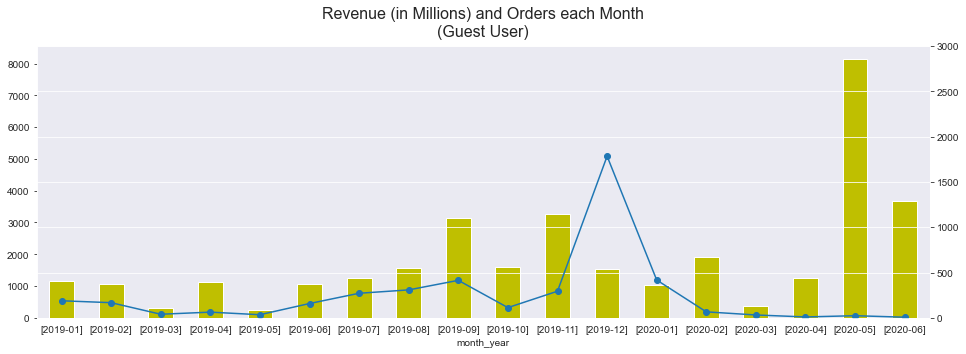

In [18]:
fig, ax1 = plt.subplots(figsize=(16,5))
ax1 = ord_rev['Total Order'].plot(kind='bar', color='y', label='Orders')
ax2 = (ord_rev['Total Revenue']/1000000).plot(kind='line', marker='o', secondary_y=True, label='Revenue')
ax1.set_title('Revenue (in Millions) and Orders each Month\n(Guest User)', fontsize=16, pad=10)
ax2.set_ylim(0, 3000)

### 2. Which Day of a week generate the highest Order and Revenue?

In [19]:
order = df.groupby('invoice_number')['days'].unique().value_counts()
order = order.sort_index()

In [20]:
revenue = df.groupby('days')['total_price'].sum()

In [21]:
ord_rev = pd.DataFrame({'Total Order':order, 'Total Revenue':revenue})

(0.0, 3000.0)

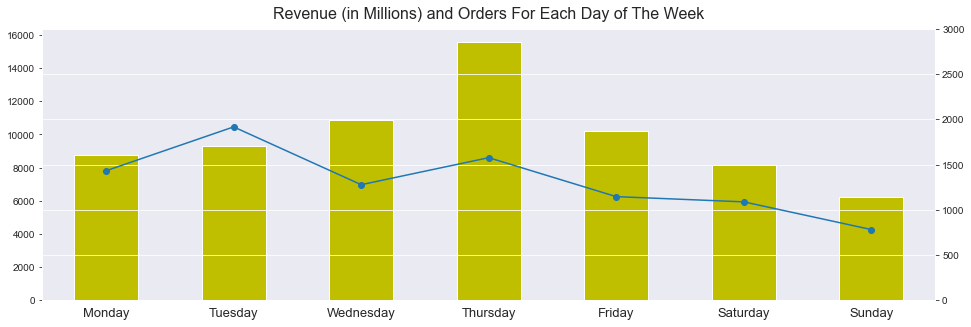

In [22]:
fig, ax1 = plt.subplots(figsize=(16,5))

ax1 = ord_rev['Total Order'].plot(kind='bar', color='y', label='Orders')
ax2 = (ord_rev['Total Revenue']/1000000).plot(kind='line', marker='o', secondary_y=True, label='Revenue')

ax1.set_title('Revenue (in Millions) and Orders For Each Day of The Week', fontsize=16, pad=10)
ax1.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'), 
                    rotation='horizontal', fontsize=13)

ax2.set_ylim(0, 3000)


### 3. Which hour the most Order are made?

In [23]:
order = df.groupby('invoice_number')['hours'].unique().value_counts()
order = order.sort_index()

In [24]:
revenue = df.groupby('hours')['total_price'].sum()

In [25]:
ord_rev = pd.DataFrame({'Total Order':order, 'Total Revenue':revenue})

(0.0, 3000.0)

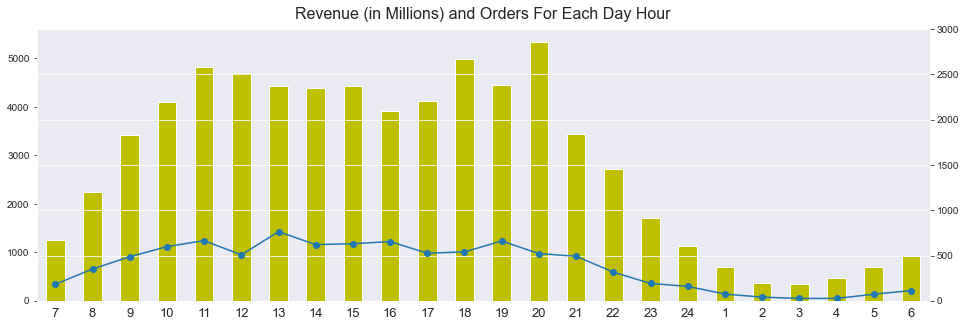

In [26]:
fig, ax1 = plt.subplots(figsize=(16,5))

ax1 = ord_rev['Total Order'].plot(kind='bar', color='y', label='Orders')
ax2 = (ord_rev['Total Revenue']/1000000).plot(kind='line', marker='o', secondary_y=True, label='Revenue')

ax1.set_title('Revenue (in Millions) and Orders For Each Day Hour', fontsize=16, pad=10)
ax1.set_xticklabels(('7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','1','2','3','4','5','6'), 
                    rotation='horizontal', fontsize=13)

ax2.set_ylim(0, 3000)


### 4. Which Date contributes the highest revenue?

In [27]:
order = df.groupby('invoice_number')['dayofmonth'].unique().value_counts()
order = order.sort_index()

In [28]:
revenue = df.groupby('dayofmonth')['total_price'].sum()

In [29]:
ord_rev = pd.DataFrame({'Total Order':order, 'Total Revenue':revenue})

(0.0, 3000.0)

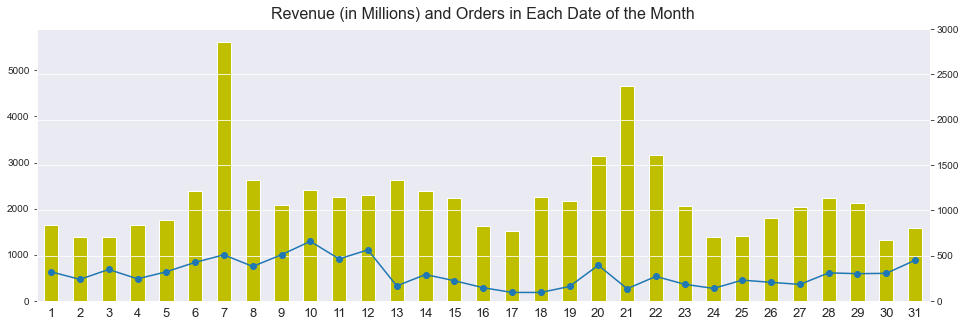

In [30]:
fig, ax1 = plt.subplots(figsize=(16,5))

ax1 = ord_rev['Total Order'].plot(kind='bar', color='y', label='Orders')
ax2 = (ord_rev['Total Revenue']/1000000).plot(kind='line', marker='o', secondary_y=True, label='Revenue')

ax1.set_title('Revenue (in Millions) and Orders in Each Date of the Month', fontsize=16, pad=10)
ax1.set_xticklabels(('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27',
                     '28','29','30','31'),rotation='horizontal', fontsize=13)

ax2.set_ylim(0, 3000)


### 5. How does each category contributes to the revenue?

In [31]:
order = df.groupby('invoice_number')['word_event'].unique().value_counts()
order.sort_index(inplace=True)

In [32]:
revenue = df.groupby('word_event')['total_price'].sum()

In [33]:
ord_rev = pd.DataFrame({'Total Order':order, 'Total Revenue':revenue})

In [34]:
ord_rev.sort_values('Total Revenue', ascending=False, inplace=True)
ord_rev = ord_rev.head(10) 

(0.0, 3000.0)

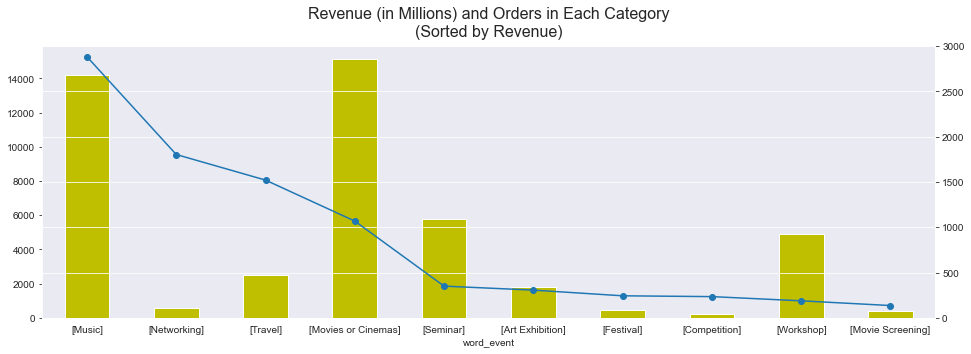

In [35]:
fig, ax1 = plt.subplots(figsize=(16,5))

ax1 = ord_rev['Total Order'].plot(kind='bar', color='y', label='Orders')
ax2 = (ord_rev['Total Revenue']/1000000).plot(kind='line', marker='o', secondary_y=True, label='Revenue')

ax1.set_title('Revenue (in Millions) and Orders in Each Category\n(Sorted by Revenue)', fontsize=16, pad=10)
ax2.set_ylim(0, 3000)


In [36]:
ord_rev = pd.DataFrame({'Total Order':order, 'Total Revenue':revenue})

In [37]:
ord_rev.sort_values('Total Order', ascending=False, inplace=True)
ord_rev = ord_rev.head(10) 

(0.0, 3000.0)

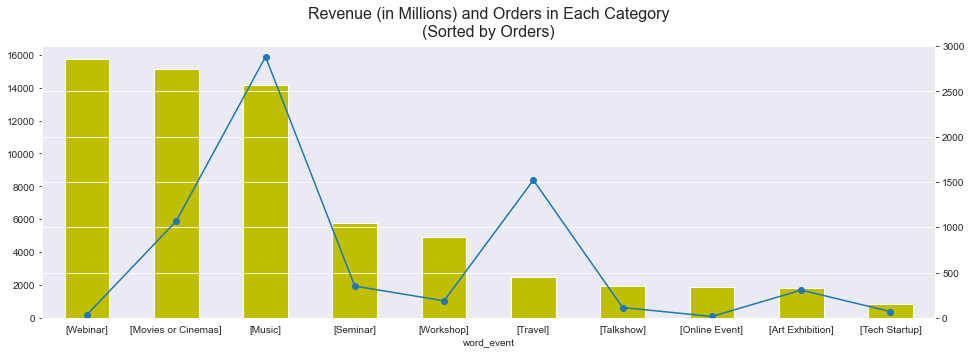

In [38]:
fig, ax1 = plt.subplots(figsize=(16,5))

ax1 = ord_rev['Total Order'].plot(kind='bar', color='y', label='Orders')
ax2 = (ord_rev['Total Revenue']/1000000).plot(kind='line', marker='o', secondary_y=True, label='Revenue')

ax1.set_title('Revenue (in Millions) and Orders in Each Category\n(Sorted by Orders)', fontsize=16, pad=10)
ax2.set_ylim(0, 3000)


### 6. How does the user rentention level?

To answer this question, i'll apply cohort analysis

In [39]:
df['month_year'] = pd.to_datetime(df['month_year'])

In [40]:
grouping = df.groupby('user_id')['month_year'] 

In [41]:
df['CohortMonth'] = grouping.transform('min')

In [42]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [43]:
invoice_year, invoice_month = get_date_int(df, 'month_year')
cohort_year, cohort_month = get_date_int(df, 'CohortMonth')

In [44]:
years_diff = invoice_year - cohort_year

months_diff = invoice_month - cohort_month

In [45]:
df['CohortIndex'] = years_diff * 12 + months_diff + 1

In [46]:
grouping = df.groupby(['CohortMonth', 'CohortIndex']) 

In [47]:
cohort_data = grouping['user_id'].apply(pd.Series.nunique) 
cohort_data = cohort_data.reset_index() 

In [48]:
cohort_data.head()

,CohortMonth,CohortIndex,user_id
0,2019-01-01,1,1607
1,2019-01-01,2,40
2,2019-01-01,3,46
3,2019-01-01,4,47
4,2019-01-01,5,25


In [49]:
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex', 
                                  values='user_id') 
(cohort_counts)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
CohortMonth,,,,,,,,,,,,,,,,,,
2019-01-01,1607.0,40.0,46.0,47.0,25.0,30.0,32.0,35.0,39.0,33.0,19.0,18.0,16.0,16.0,6.0,19.0,18.0,18.0
2019-02-01,2074.0,52.0,44.0,13.0,20.0,45.0,57.0,37.0,11.0,16.0,12.0,11.0,45.0,5.0,11.0,7.0,4.0,NaN
2019-03-01,603.0,91.0,39.0,61.0,76.0,54.0,19.0,21.0,13.0,16.0,9.0,11.0,1.0,3.0,5.0,4.0,NaN,NaN
2019-04-01,1535.0,23.0,33.0,50.0,34.0,25.0,22.0,16.0,10.0,8.0,8.0,1.0,7.0,7.0,1.0,NaN,NaN,NaN
2019-05-01,342.0,15.0,18.0,21.0,18.0,17.0,8.0,7.0,10.0,9.0,2.0,7.0,12.0,5.0,NaN,NaN,NaN,NaN
2019-06-01,1341.0,55.0,54.0,28.0,16.0,17.0,16.0,6.0,10.0,2.0,17.0,20.0,28.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,1818.0,148.0,65.0,30.0,24.0,17.0,18.0,11.0,10.0,17.0,17.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,2852.0,180.0,41.0,39.0,14.0,21.0,15.0,4.0,13.0,28.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,4523.0,91.0,58.0,37.0,23.0,34.0,7.0,24.0,79.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
retention = cohort_counts.divide(cohort_counts.iloc[:,0], axis=0)
retention.round(4) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
CohortMonth,,,,,,,,,,,,,,,,,,
2019-01-01,100.0,2.49,2.86,2.92,1.56,1.87,1.99,2.18,2.43,2.05,1.18,1.12,1.00,1.00,0.37,1.18,1.12,1.12
2019-02-01,100.0,2.51,2.12,0.63,0.96,2.17,2.75,1.78,0.53,0.77,0.58,0.53,2.17,0.24,0.53,0.34,0.19,NaN
2019-03-01,100.0,15.09,6.47,10.12,12.60,8.96,3.15,3.48,2.16,2.65,1.49,1.82,0.17,0.50,0.83,0.66,NaN,NaN
2019-04-01,100.0,1.50,2.15,3.26,2.21,1.63,1.43,1.04,0.65,0.52,0.52,0.07,0.46,0.46,0.07,NaN,NaN,NaN
2019-05-01,100.0,4.39,5.26,6.14,5.26,4.97,2.34,2.05,2.92,2.63,0.58,2.05,3.51,1.46,NaN,NaN,NaN,NaN
2019-06-01,100.0,4.10,4.03,2.09,1.19,1.27,1.19,0.45,0.75,0.15,1.27,1.49,2.09,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,8.14,3.58,1.65,1.32,0.94,0.99,0.61,0.55,0.94,0.94,0.88,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,6.31,1.44,1.37,0.49,0.74,0.53,0.14,0.46,0.98,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,2.01,1.28,0.82,0.51,0.75,0.15,0.53,1.75,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


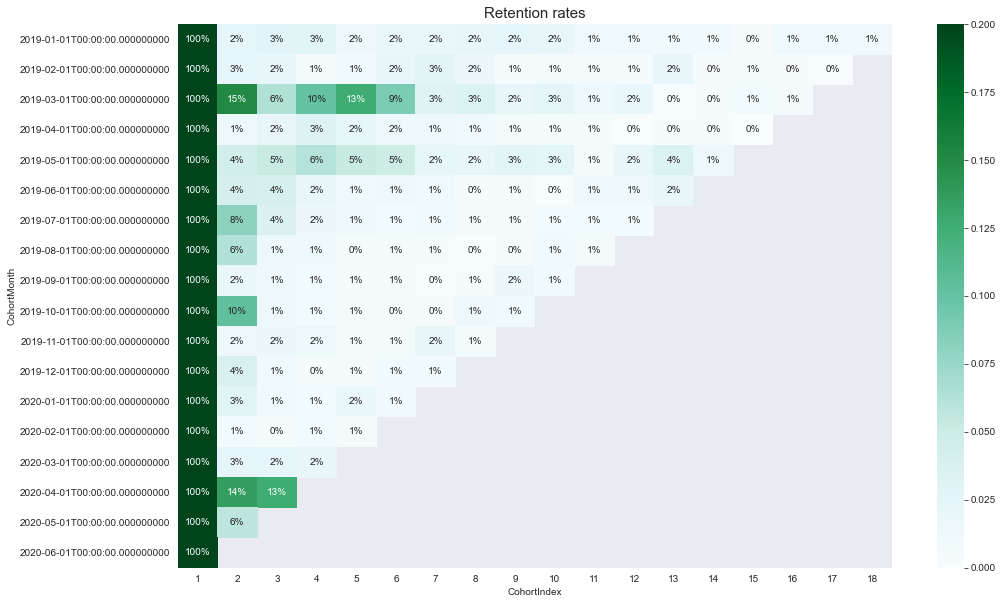

In [51]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title('Retention rates', fontsize=15)
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0, 
            vmax = 0.2, 
            cmap = 'BuGn')

#### 6.1 REGISTERED

In [52]:
grouping = df[df['user_type']=='Registered'].groupby(['CohortMonth', 'CohortIndex']) 

In [53]:
cohort_data = grouping['user_id'].apply(pd.Series.nunique) 
cohort_data = cohort_data.reset_index() 

In [54]:
cohort_data.head()

,CohortMonth,CohortIndex,user_id
0,2019-01-01,1,502
1,2019-01-01,2,26
2,2019-01-01,3,41
3,2019-01-01,4,37
4,2019-01-01,5,21


In [55]:
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex', 
                                  values='user_id') 
(cohort_counts)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
CohortMonth,,,,,,,,,,,,,,,,,,
2019-01-01,502.0,26.0,41.0,37.0,21.0,22.0,25.0,25.0,27.0,18.0,9.0,11.0,9.0,8.0,2.0,12.0,12.0,6.0
2019-02-01,1057.0,45.0,40.0,13.0,18.0,45.0,55.0,34.0,9.0,13.0,11.0,8.0,16.0,3.0,8.0,4.0,2.0,NaN
2019-03-01,313.0,85.0,39.0,60.0,72.0,46.0,18.0,20.0,12.0,15.0,9.0,10.0,1.0,3.0,3.0,3.0,NaN,NaN
2019-04-01,485.0,20.0,29.0,40.0,30.0,21.0,15.0,13.0,9.0,6.0,7.0,NaN,3.0,4.0,NaN,NaN,NaN,NaN
2019-05-01,110.0,8.0,10.0,10.0,7.0,7.0,3.0,3.0,5.0,5.0,NaN,2.0,2.0,3.0,NaN,NaN,NaN,NaN
2019-06-01,374.0,44.0,35.0,17.0,10.0,9.0,10.0,4.0,6.0,2.0,13.0,11.0,14.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,663.0,101.0,39.0,21.0,15.0,12.0,12.0,8.0,6.0,8.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,1491.0,115.0,12.0,25.0,9.0,12.0,10.0,2.0,7.0,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,1725.0,46.0,26.0,18.0,11.0,16.0,6.0,15.0,36.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
retention = cohort_counts.divide(cohort_counts.iloc[:,0], axis=0)
retention.round(4) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
CohortMonth,,,,,,,,,,,,,,,,,,
2019-01-01,100.0,5.18,8.17,7.37,4.18,4.38,4.98,4.98,5.38,3.59,1.79,2.19,1.79,1.59,0.40,2.39,2.39,1.2
2019-02-01,100.0,4.26,3.78,1.23,1.70,4.26,5.20,3.22,0.85,1.23,1.04,0.76,1.51,0.28,0.76,0.38,0.19,NaN
2019-03-01,100.0,27.16,12.46,19.17,23.00,14.70,5.75,6.39,3.83,4.79,2.88,3.19,0.32,0.96,0.96,0.96,NaN,NaN
2019-04-01,100.0,4.12,5.98,8.25,6.19,4.33,3.09,2.68,1.86,1.24,1.44,NaN,0.62,0.82,NaN,NaN,NaN,NaN
2019-05-01,100.0,7.27,9.09,9.09,6.36,6.36,2.73,2.73,4.55,4.55,NaN,1.82,1.82,2.73,NaN,NaN,NaN,NaN
2019-06-01,100.0,11.76,9.36,4.55,2.67,2.41,2.67,1.07,1.60,0.53,3.48,2.94,3.74,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,15.23,5.88,3.17,2.26,1.81,1.81,1.21,0.90,1.21,0.90,1.51,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,7.71,0.80,1.68,0.60,0.80,0.67,0.13,0.47,0.94,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,2.67,1.51,1.04,0.64,0.93,0.35,0.87,2.09,1.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


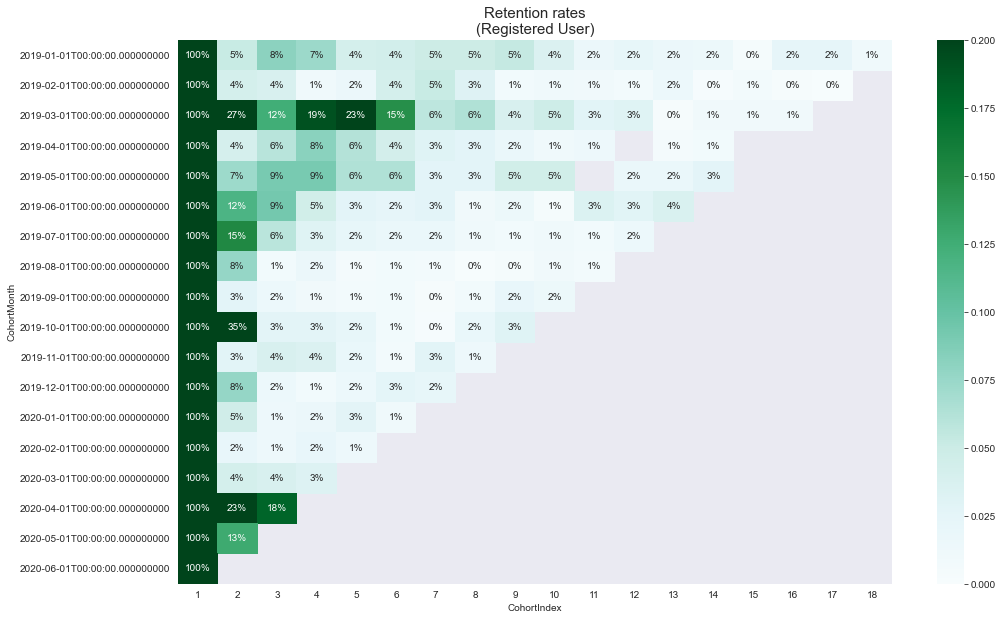

In [57]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title('Retention rates\n(Registered User)', fontsize=15)
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0, 
            vmax = 0.2, 
            cmap = 'BuGn')

#### 6.2 GUEST

In [58]:
grouping = df[df['user_type']!='Registered'].groupby(['CohortMonth', 'CohortIndex']) 

In [59]:
cohort_data = grouping['user_id'].apply(pd.Series.nunique) 
cohort_data = cohort_data.reset_index() 

In [60]:
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex', 
                                  values='user_id') 
(cohort_counts)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
CohortMonth,,,,,,,,,,,,,,,,,,
2019-01-01,1105.0,14.0,5.0,10.0,4.0,8.0,7.0,10.0,12.0,15.0,10.0,7.0,7.0,8.0,4.0,7.0,6.0,12.0
2019-02-01,1017.0,7.0,4.0,NaN,2.0,NaN,2.0,3.0,2.0,3.0,1.0,3.0,29.0,2.0,3.0,3.0,2.0,NaN
2019-03-01,290.0,6.0,NaN,1.0,4.0,8.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,2.0,1.0,NaN,NaN
2019-04-01,1050.0,3.0,4.0,10.0,4.0,4.0,7.0,3.0,1.0,2.0,1.0,1.0,4.0,3.0,1.0,NaN,NaN,NaN
2019-05-01,232.0,7.0,8.0,11.0,11.0,10.0,5.0,4.0,5.0,4.0,2.0,5.0,10.0,2.0,NaN,NaN,NaN,NaN
2019-06-01,967.0,11.0,19.0,11.0,6.0,8.0,6.0,2.0,4.0,NaN,4.0,9.0,14.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,1155.0,47.0,26.0,9.0,9.0,5.0,6.0,3.0,4.0,9.0,11.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,1361.0,65.0,29.0,14.0,5.0,9.0,5.0,2.0,6.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,2798.0,45.0,32.0,19.0,12.0,18.0,1.0,9.0,43.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
retention = cohort_counts.divide(cohort_counts.iloc[:,0], axis=0)
retention.round(4) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
CohortMonth,,,,,,,,,,,,,,,,,,
2019-01-01,100.0,1.27,0.45,0.90,0.36,0.72,0.63,0.90,1.09,1.36,0.90,0.63,0.63,0.72,0.36,0.63,0.54,1.09
2019-02-01,100.0,0.69,0.39,NaN,0.20,NaN,0.20,0.29,0.20,0.29,0.10,0.29,2.85,0.20,0.29,0.29,0.20,NaN
2019-03-01,100.0,2.07,NaN,0.34,1.38,2.76,0.34,0.34,0.34,0.34,NaN,0.34,NaN,NaN,0.69,0.34,NaN,NaN
2019-04-01,100.0,0.29,0.38,0.95,0.38,0.38,0.67,0.29,0.10,0.19,0.10,0.10,0.38,0.29,0.10,NaN,NaN,NaN
2019-05-01,100.0,3.02,3.45,4.74,4.74,4.31,2.16,1.72,2.16,1.72,0.86,2.16,4.31,0.86,NaN,NaN,NaN,NaN
2019-06-01,100.0,1.14,1.96,1.14,0.62,0.83,0.62,0.21,0.41,NaN,0.41,0.93,1.45,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,4.07,2.25,0.78,0.78,0.43,0.52,0.26,0.35,0.78,0.95,0.52,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,4.78,2.13,1.03,0.37,0.66,0.37,0.15,0.44,1.03,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,1.61,1.14,0.68,0.43,0.64,0.04,0.32,1.54,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


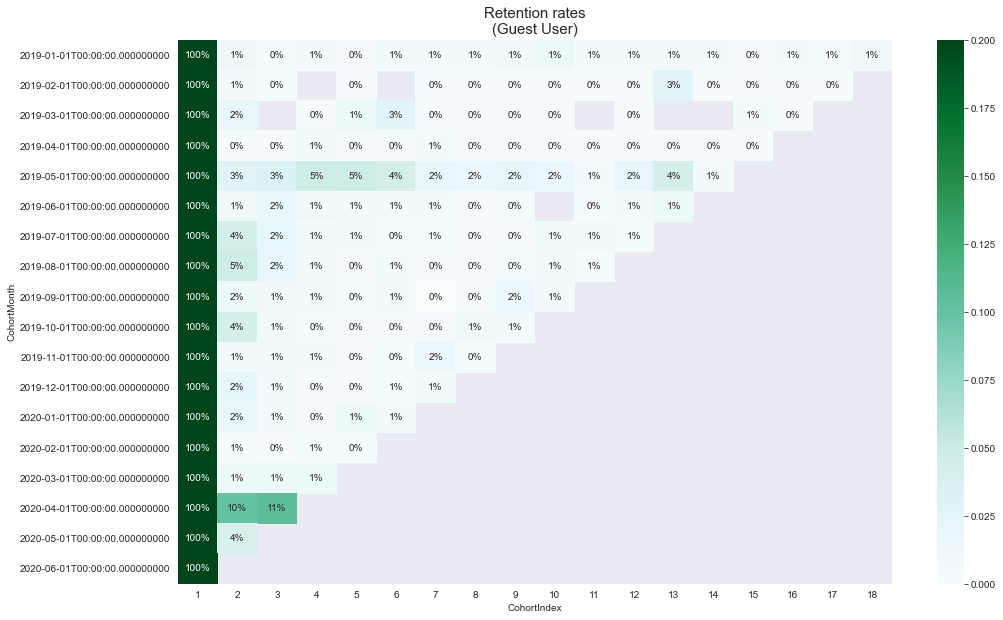

In [62]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title('Retention rates\n(Guest User)', fontsize=15)
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0, 
            vmax = 0.2, 
            cmap = 'BuGn')

### 7. Pre and Post Covid

In [63]:
df_before = df[df['month_year'] < '2020-03-01']

In [64]:
df_after = df[df['month_year'] >= '2020-03-01']

#### 7.1 Most Category Order Before Covid

In [88]:
order = df_before.groupby('invoice_number')['word_event'].unique().value_counts()
order.sort_index(inplace=True)

In [89]:
revenue = df_before.groupby('word_event')['total_price'].sum()

In [90]:
ord_rev = pd.DataFrame({'Total Order':order, 'Total Revenue':revenue})
ord_rev = ord_rev.head(10)

In [91]:
ord_rev.sort_values('Total Order', ascending=False, inplace=True)

(0.0, 6000.0)

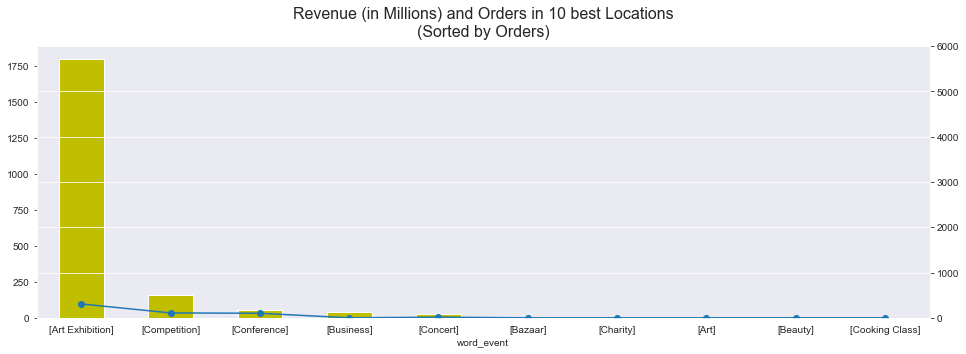

In [92]:
fig, ax1 = plt.subplots(figsize=(16,5))

ax1 = ord_rev['Total Order'].plot(kind='bar', color='y', label='Orders')
ax2 = (ord_rev['Total Revenue']/1000000).plot(kind='line', marker='o', secondary_y=True, label='Revenue')

ax1.set_title('Revenue (in Millions) and Orders in 10 best Locations\n(Sorted by Orders)', fontsize=16, pad=10)
ax2.set_ylim(0, 6000)

#### 7.2 Most Category Orders After Covid

In [93]:
order = df_after.groupby('invoice_number')['word_event'].unique().value_counts()

In [94]:
order.sort_index(inplace=True)

In [95]:
revenue = df_after.groupby('word_event')['total_price'].sum()

In [96]:
ord_rev = pd.DataFrame({'Total Order':order, 'Total Revenue':revenue})

In [97]:
ord_rev.sort_values('Total Order', ascending=False, inplace=True)
ord_rev = ord_rev.head(10) 

(0.0, 6000.0)

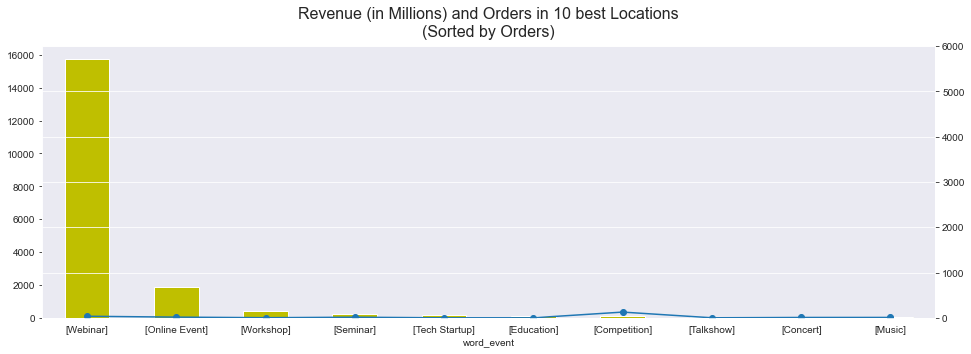

In [98]:
fig, ax1 = plt.subplots(figsize=(16,5))

ax1 = ord_rev['Total Order'].plot(kind='bar', color='y', label='Orders')
ax2 = (ord_rev['Total Revenue']/1000000).plot(kind='line', marker='o', secondary_y=True, label='Revenue')

ax1.set_title('Revenue (in Millions) and Orders in 10 best Locations\n(Sorted by Orders)', fontsize=16, pad=10)
ax2.set_ylim(0, 6000)

### 8. Which location the most order are made?

**By Orders**

In [76]:
order = df.groupby('invoice_number')['location'].unique().value_counts()

In [77]:
order.sort_index(inplace=True)

In [78]:
revenue = df.groupby('location')['total_price'].sum()

In [79]:
ord_rev = pd.DataFrame({'Total Order':order, 'Total Revenue':revenue})

In [80]:
ord_rev.sort_values('Total Order', ascending=False, inplace=True)
ord_rev = ord_rev.head(10) 

(0.0, 6000.0)

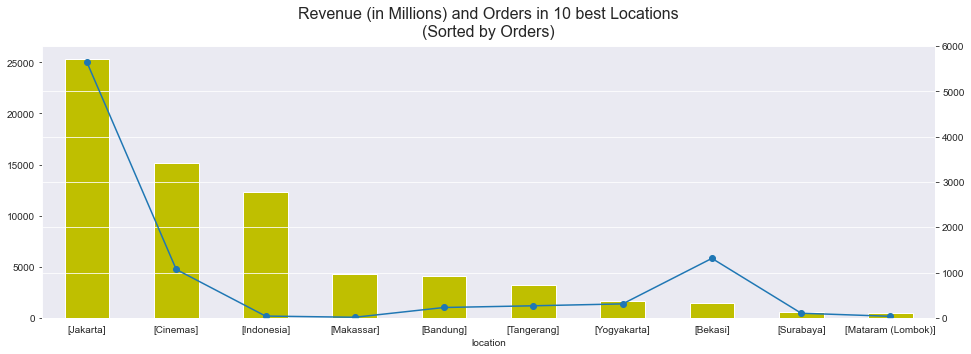

In [81]:
fig, ax1 = plt.subplots(figsize=(16,5))

ax1 = ord_rev['Total Order'].plot(kind='bar', color='y', label='Orders')
ax2 = (ord_rev['Total Revenue']/1000000).plot(kind='line', marker='o', secondary_y=True, label='Revenue')

ax1.set_title('Revenue (in Millions) and Orders in 10 best Locations\n(Sorted by Orders)', fontsize=16, pad=10)
ax2.set_ylim(0, 6000)

**By Revenues**

In [82]:
order = df.groupby('invoice_number')['location'].unique().value_counts()

In [83]:
order.sort_index(inplace=True)

In [84]:
revenue = df.groupby('location')['total_price'].sum()

In [85]:
ord_rev = pd.DataFrame({'Total Order':order, 'Total Revenue':revenue})

In [86]:
ord_rev.sort_values('Total Revenue', ascending=False, inplace=True)
ord_rev = ord_rev.head(10) 

(0.0, 6000.0)

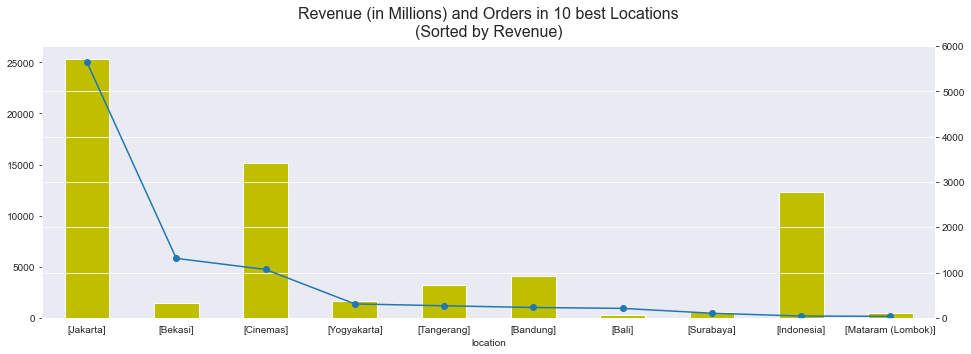

In [87]:
fig, ax1 = plt.subplots(figsize=(16,5))

ax1 = ord_rev['Total Order'].plot(kind='bar', color='y', label='Orders')
ax2 = (ord_rev['Total Revenue']/1000000).plot(kind='line', marker='o', secondary_y=True, label='Revenue')

ax1.set_title('Revenue (in Millions) and Orders in 10 best Locations\n(Sorted by Revenue)', fontsize=16, pad=10)
ax2.set_ylim(0, 6000)